In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
#sys.path.insert(0, '../src/') #use relative path
os.chdir("../005_src")

from config_GCN_018 import *

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Functions Data Adjustments import successful
Custom loss imported
Functions Plotting import successful
Functions Plotting import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
-------------

In [2]:
#--------------------------------
## WARNINGS MUTED
#--------------------------------
pd.options.mode.chained_assignment = None
plt.rcParams.update({'figure.max_open_warning': 0})


In [3]:
### old inputs with intention right, left, u turn
#input_file_name = "20210710-20h38m27s_timesteps14930_ec3500_em7000" #15000
#input_file_name = "20210711-17h59m44s_timesteps30000_ec3500_em7000" #30000
input_file_name = "20210710-11h46m35s_timesteps200_ec3500_em7000"

### new inputs with intention N,S,E,W,C
#input_file_name = "20210724-19h49m31s_timesteps150000_ec3500_em7000"
#input_file_name = "20210725-16h24m21s_timesteps200_ec3500_em7000"

input_file_name = "20210807-15h06m18s_timesteps20000_ec3500_em7000"

In [4]:
print (f"\n> SELECTING INPUT ROWS")
df_all,df_selected = select_rows_from_data(input_file_name,drop_col = True)
print (f"\n> CORRECTING COLUMNS DATA_POS, DATA_Y_POS, DATA_Y_YAW")

    
# for now we take only the coherent rows
df_input = adjust_columns_2(df_selected)
printif(f"selected {len(df_input)} coherent rows over {len(df_all)} total",printstat)


> SELECTING INPUT ROWS
---------------------------
<class 'pandas.core.frame.DataFrame'>
---------------------------

> CORRECTING COLUMNS DATA_POS, DATA_Y_POS, DATA_Y_YAW
5                                  [[False], [False]]
6                                  [[False], [False]]
7                                  [[False], [False]]
8                                  [[False], [False]]
9                                  [[False], [False]]
                             ...                     
20022    [[True], [False], [False], [False], [False]]
20027    [[True], [False], [False], [False], [False]]
20028    [[True], [False], [False], [False], [False]]
20029    [[True], [False], [False], [False], [False]]
20030    [[True], [False], [False], [False], [False]]
Name: Still_vehicle, Length: 16241, dtype: object
selected 16241 coherent rows over 19737 total


In [5]:
df_input.columns

Index(['data_x', 'data_pos', 'data_edges', 'data_edges_renamed', 'data_y',
       'data_edges_attr', 'training_row', 'Still_vehicle', 'data_pos_zc',
       'data_y_zc', 'data_y_yaw', 'data_x_rad', 'data_x_speed', 'data_x_yaw',
       'data_x_intention', 'data_y_delta', 'all_veh_moving', 'num_veh_tot',
       'num_veh_moving', 'num_veh_still', 'data_classes', 'data_y_classes'],
      dtype='object')

In [6]:
df_input

,data_x,data_pos,data_edges,data_edges_renamed,data_y,data_edges_attr,training_row,Still_vehicle,data_pos_zc,data_y_zc,...,data_x_speed,data_x_yaw,data_x_intention,data_y_delta,all_veh_moving,num_veh_tot,num_veh_moving,num_veh_still,data_classes,data_y_classes
5,"[[180.0, 5.52, 2.0, 2.0, 27.0], [0.0, 0.0, 0.0...","[[98.4, 183.26], [101.6, 5.1]]","[[0], [1]]","[[0], [1]]","[[98.4, 166.53, 180.0], [101.6, 12.05, 0.0]]",[1.4000000000000001],True,"[[False], [False]]","[[-1.5999999999999943, 83.25999999999999], [1....","[[-1.5999999999999943, 66.53], [1.599999999999...",...,"[[5.52], [0.0]]","[180.0, 0.0]","[[2.0], [0.0]]","[[0.0, -16.72999999999999], [0.0, 6.9500000000...",True,2,2,0,"[[49], [50]]","[[48], [50]]"
6,"[[180.0, 7.61, 2.0, 2.0, 26.0], [0.0, 2.22, 0....","[[98.4, 175.65], [101.6, 7.32]]","[[0], [1]]","[[0], [1]]","[[98.4, 154.84, 180.0], [101.6, 19.12, 0.0]]",[1.4000000000000001],True,"[[False], [False]]","[[-1.5999999999999943, 75.65], [1.599999999999...","[[-1.5999999999999943, 54.84], [1.599999999999...",...,"[[7.61], [2.22]]","[180.0, 0.0]","[[2.0], [0.0]]","[[0.0, -20.810000000000002], [0.0, 11.80000000...",True,2,2,0,"[[48], [50]]","[[47], [50]]"
7,"[[180.0, 9.13, 2.0, 2.0, 25.0], [0.0, 4.73, 0....","[[98.4, 166.53], [101.6, 12.05]]","[[0], [1]]","[[0], [1]]","[[98.4, 141.86, 180.0], [101.6, 28.47, 0.0]]",[1.4000000000000001],True,"[[False], [False]]","[[-1.5999999999999943, 66.53], [1.599999999999...","[[-1.5999999999999943, 41.860000000000014], [1...",...,"[[9.13], [4.73]]","[180.0, 0.0]","[[2.0], [0.0]]","[[0.0, -24.669999999999987], [0.0, 16.42]]",True,2,2,0,"[[48], [50]]","[[47], [51]]"
8,"[[180.0, 11.68, 2.0, 2.0, 24.0], [0.0, 7.07, 0...","[[98.4, 154.84], [101.6, 19.12]]","[[0], [1]]","[[0], [1]]","[[98.4, 126.41, 180.0], [101.6, 40.16, 0.0]]",[1.6],True,"[[False], [False]]","[[-1.5999999999999943, 54.84], [1.599999999999...","[[-1.5999999999999943, 26.409999999999997], [1...",...,"[[11.68], [7.07]]","[180.0, 0.0]","[[2.0], [0.0]]","[[0.0, -28.430000000000007], [0.0, 21.03999999...",True,2,2,0,"[[47], [50]]","[[46], [52]]"
9,"[[180.0, 12.99, 2.0, 2.0, 23.0], [0.0, 9.36, 0...","[[98.4, 141.86], [101.6, 28.47]]","[[0], [1]]","[[0], [1]]","[[98.4, 109.06, 180.0], [101.6, 53.66, 0.0]]",[1.7999999999999998],True,"[[False], [False]]","[[-1.5999999999999943, 41.860000000000014], [1...","[[-1.5999999999999943, 9.060000000000002], [1....",...,"[[12.99], [9.36]]","[180.0, 0.0]","[[2.0], [0.0]]","[[0.0, -32.80000000000001], [0.0, 25.189999999...",True,2,2,0,"[[47], [51]]","[[45], [52]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20022,"[[270.0, 0.0, 4.0, 0.0, 17.0], [0.0, 12.88, 0....","[[108.2, 101.6], [101.6, 161.94], [101.6, 129....","[[1926, 1926, 1926, 1926, 1927, 1927, 1927, 19...","[[0, 0, 0, 0, 1, 1, 1, 2, 2, 3], [1, 2, 3, 4, ...","[[108.2, 101.6, 270.0], [101.6, 192.98, 0.0], ...","[2.4000000000000004, 5.0, 2.0999999999999996, ...",True,"[[True], [False], [False], [False], [False]]","[[8.200000000000003, 1.5999999999999943], [1.5...","[[8.200000000000003, 1.5999999999999943], [1.5...",...,"[[0.0], [12.88], [9.34], [7.69], [3.86]]","[270.0, 0.0, 0.0, 0.0, 180.0]","[[4.0], [0.0], [0.0], [0.0], [4.0]]","[[0.0, 0.0], [0.0, 31.039999999999992], [0.0, ...",False,5,4,1,"[[55], [58], [56], [51], [49]]","[[55], [59], [57], [52], [48]]"
20027,"[[270.0, 0.0, 4.0, 0.0, 12.0], [0.0, 17.9, 0.0...","[[108.2, 101.6], [101.6, 97.2], [98.4, 138.23]...","[[1926, 1926, 1926, 1926, 1929, 1929, 1929, 19...","[[0, 0, 0, 0, 1, 1, 1, 2, 2, 3], [1, 2, 3, 4, ...","[[108.2, 101.6, 270.0], [101.6, 137.44, 0.0], ...","[18.3, 3.9000000000000004, 1.6, 1.700000000000...",True,"[[True], [False], [False], [False], [False]]","[[8.200000000000003, 1.5999999999999943], [1.5...","[[8.200000000000003, 1.5999999999999943], [1.5...",...,"[[0.0], [17.9], [13.88], [0.0], [3.83]]","[270.0, 0.0, 180.0, 180.0, 270.0]","[[4.0], [0.0], [4.0], [4.0], [4.0]]","[[0.0, 0.0], [0.0, 40.239999999999995], [0.0, ...",Fal

In [8]:
mask = df_input.num_veh_moving == 5 
df_input[mask]

,data_x,data_pos,data_edges,data_edges_renamed,data_y,data_edges_attr,training_row,Still_vehicle,data_pos_zc,data_y_zc,...,data_x_speed,data_x_yaw,data_x_intention,data_y_delta,all_veh_moving,num_veh_tot,num_veh_moving,num_veh_still,data_classes,data_y_classes
157,"[[284.32, 3.79, 0.0, 3.0, 40.0], [270.0, 1.24,...","[[103.32, 102.81], [114.46, 101.6], [123.2, 10...","[[12, 12, 12, 12, 13, 13, 13, 15, 15, 16], [13...","[[1, 1, 1, 1, 2, 2, 2, 3, 3, 4], [2, 3, 4, 0, ...","[[101.6, 115.53, 0.0], [106.36, 101.72, 271.37...","[10.0, 6.4, 1.9, 11.4, 10.0, 1.8, 6.8, 1.8, 5....",True,"[[False], [False], [False], [False], [False]]","[[3.319999999999993, 2.8100000000000023], [14....","[[1.5999999999999943, 15.530000000000001], [6....",...,"[[3.79], [1.24], [0.0], [0.0], [7.72]]","[284.32, 270.0, 270.0, 270.0, 90.0]","[[0.0], [0.0], [0.0], [3.0], [1.0]]","[[-1.7199999999999989, 12.719999999999999], [-...",True,5,5,0,"[[55], [55], [65], [65], [14]]","[[55], [55], [55], [65], [24]]"
158,"[[346.19, 5.82, 0.0, 3.0, 40.0], [270.0, 2.92,...","[[101.6, 108.14], [111.54, 101.6], [122.27, 10...","[[12, 12, 12, 12, 13, 13, 13, 15, 15, 16], [13...","[[1, 1, 1, 1, 2, 2, 2, 3, 3, 4], [2, 3, 4, 0, ...","[[101.6, 125.22, 0.0], [101.96, 104.73, 308.02...","[9.2, 5.9, 2.1, 12.8, 9.2, 2.1, 6.8, 2.0, 5.0,...",True,"[[False], [False], [False], [False], [False]]","[[1.5999999999999943, 8.14], [11.5400000000000...","[[1.5999999999999943, 25.22], [1.9599999999999...",...,"[[5.82], [2.92], [0.93], [0.0], [10.11]]","[346.19, 270.0, 270.0, 270.0, 90.0]","[[0.0], [0.0], [0.0], [3.0], [1.0]]","[[0.0, 17.08], [-9.580000000000013, 3.13000000...",True,5,5,0,"[[55], [55], [65], [65], [14]]","[[56], [55], [55], [65], [34]]"
159,"[[0.0, 7.4, 0.0, 3.0, 40.0], [271.37, 5.19, 0....","[[101.6, 115.53], [106.36, 101.72], [119.6, 10...","[[12, 12, 12, 12, 13, 13, 13, 15, 15, 16], [13...","[[1, 1, 1, 1, 2, 2, 2, 3, 3, 4], [2, 3, 4, 0, ...","[[101.6, 137.22, 0.0], [101.6, 109.43, 354.22]...","[8.899999999999999, 5.4, 2.7, 9.8, 8.1, 2.5999...",True,"[[False], [False], [False], [False], [False]]","[[1.5999999999999943, 15.530000000000001], [6....","[[1.5999999999999943, 37.22], [1.5999999999999...",...,"[[7.4], [5.19], [2.67], [0.67], [12.2]]","[0.0, 271.37, 270.0, 270.0, 90.0]","[[0.0], [0.0], [0.0], [3.0], [1.0]]","[[0.0, 21.689999999999998], [-4.76000000000000...",True,5,5,0,"[[55], [55], [55], [65], [24]]","[[56], [55], [55], [65], [34]]"
160,"[[0.0, 9.69, 0.0, 3.0, 40.0], [308.02, 5.68, 0...","[[101.6, 125.22], [101.96, 104.73], [114.34, 1...","[[12, 12, 12, 12, 13, 13, 13, 15, 15, 16], [13...","[[1, 1, 1, 1, 2, 2, 2, 3, 3, 4], [2, 3, 4, 0, ...","[[101.6, 151.28, 0.0], [101.6, 115.48, 0.0], [...","[10.8, 5.7, 3.7, 6.4, 7.6, 3.4, 5.9, 3.2, 5.1,...",True,"[[False], [False], [False], [False], [False]]","[[1.5999999999999943, 25.22], [1.9599999999999...","[[1.5999999999999943, 51.28], [1.5999999999999...",...,"[[9.69], [5.68], [5.25], [2.84], [13.98]]","[0.0, 308.02, 270.0, 270.0, 90.0]","[[0.0], [0.0], [0.0], [3.0], [1.0]]","[[0.0, 26.060000000000002], [-0.35999999999999...",True,5,5,0,"[[56], [55], [55], [65], [34]]","[[57], [55], [55], [55], [44]]"
161,"[[0.0, 12.0, 0.0, 3.0, 40.0], [354.22, 4.74, 0...","[[101.6, 137.22], [101.6, 109.43], [109.51, 10...","[[12, 12, 12, 12, 13, 13, 13, 15, 15, 16], [13...","[[1, 1, 1, 1, 2, 2, 2, 3, 3, 4], [2, 3, 4, 0, ...","[[101.6, 167.04, 0.0], [101.6, 124.04, 0.0], [...","[14.9, 6.6000000000000005, 5.6, 4.5, 8.2, 5.3,...",True,"[[False], [False], [False], [False], [False]]","[[1.5999999999999943, 37.22], [1.5999999999999...","[[1.5999999999999943, 67.03999999999999], [1.5...",...,"[[12.0], [4.74], [4.84], [4.53], [14.47]]","[0.0, 354.22, 270.0, 270.0, 90.0]","[[0.0], [0.0], [0.0], [3.0], [1.0]]","[[0.0, 29.819999999999993], [0.0, 14.61], [-7....",True,5,5,0,"[[56], [55], [55], [65], [34]]","[[58], [56], [55], [55], [44]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19871,"[[180.0, 4.23, 2.0, 0.0, 1

In [22]:
test_list1 = list_flatten(df_input.data_classes.iloc[0])
test_list2 = [24,34]

In [25]:
all(elem in selected_classes for elem in test_list1)

False

In [24]:
all(elem in selected_classes for elem in test_list2)

True

In [51]:
selected_classes = [54,44,34,24,24]

In [59]:
df_input.flatten_list_classes

5                    [49, 50]
6                    [48, 50]
7                    [48, 50]
8                    [47, 50]
9                    [47, 51]
                 ...         
20022    [55, 58, 56, 51, 49]
20027    [55, 54, 46, 49, 95]
20028    [55, 55, 46, 49, 95]
20029    [55, 56, 45, 49, 85]
20030    [55, 57, 44, 49, 85]
Name: flatten_list_classes, Length: 16241, dtype: object

In [52]:
df_input.loc[:,"flatten_list_classes"] = df_input.apply(lambda x: list_flatten(x['data_classes']),axis=1)
df_input.loc[:,"check_classes"] = df_input.apply(lambda x: selected_classes,axis=1)

In [61]:
mask = df_input.flatten_list_classes.apply(lambda x: all(elem in selected_classes for elem in x))
df_cleaned = df_input[mask]

In [63]:
df_cleaned.index

Int64Index([  644,   645,   646,   647,   648,   649,   650,   651,   652,
              653,
            ...
            19845, 19846, 19847, 19848, 19849, 19850, 19851, 19852, 19853,
            19854],
           dtype='int64', length=399)

In [64]:
file_to_write = f"../004_data/GCN_input/df_CHECK.pkl"
df_cleaned.to_pickle(file_to_write)

In [67]:
mask = df_cleaned.num_veh_moving == 5 
df_cleaned_2 = df_cleaned[mask]

In [68]:
file_to_write = f"../004_data/GCN_input/df_CHECK_2.pkl"
df_cleaned_2.to_pickle(file_to_write)

In [69]:
file_to_write = f"../004_data/GCN_input/df_CHECK_2.pkl"
unpickled_df = pd.read_pickle(file_to_write)
unpickled_df

,data_x,data_pos,data_edges,data_edges_renamed,data_y,data_edges_attr,training_row,Still_vehicle,data_pos_zc,data_y_zc,...,data_x_intention,data_y_delta,all_veh_moving,num_veh_tot,num_veh_moving,num_veh_still,data_classes,data_y_classes,flatten_list_classes,check_classes
4877,"[[90.0, 5.22, 1.0, 3.0, 40.0], [90.0, 3.81, 3....","[[103.04, 98.4], [89.37, 98.4], [77.99, 98.4],...","[[489, 489, 489, 489, 494, 494, 494, 495, 495,...","[[0, 0, 0, 0, 1, 1, 1, 2, 2, 3], [1, 2, 3, 4, ...","[[119.74, 98.4, 90.0], [93.97, 99.18, 80.67], ...","[13.0, 6.5, 4.8, 3.8, 8.9, 5.8, 4.4, 9.1, 5.7,...",True,"[[False], [False], [False], [False], [False]]","[[3.0400000000000063, -1.5999999999999943], [-...","[[19.739999999999995, -1.5999999999999943], [-...",...,"[[1.0], [3.0], [3.0], [1.0], [1.0]]","[[16.69999999999999, 0.0], [4.599999999999994,...",True,5,5,0,"[[54], [44], [34], [34], [34]]","[[54], [44], [44], [34], [34]]","[54, 44, 34, 34, 34]","[54, 44, 34, 24, 24]"
4878,"[[90.0, 7.52, 1.0, 3.0, 40.0], [90.0, 2.36, 3....","[[110.56, 98.4], [91.73, 98.4], [81.44, 98.4],...","[[489, 489, 489, 489, 494, 494, 494, 495, 495,...","[[0, 0, 0, 0, 1, 1, 1, 2, 2, 3], [1, 2, 3, 4, ...","[[131.03, 98.4, 90.0], [93.6, 101.07, 37.83], ...","[12.100000000000001, 7.1000000000000005, 4.5, ...",True,"[[False], [False], [False], [False], [False]]","[[10.560000000000002, -1.5999999999999943], [-...","[[31.03, -1.5999999999999943], [-6.40000000000...",...,"[[1.0], [3.0], [3.0], [1.0], [1.0]]","[[20.47, 0.0], [1.8699999999999903, 2.66999999...",True,5,5,0,"[[54], [44], [44], [34], [34]]","[[64], [45], [44], [34], [34]]","[54, 44, 44, 34, 34]","[54, 44, 34, 24, 24]"
4879,"[[90.0, 9.18, 1.0, 3.0, 40.0], [80.67, 2.48, 3...","[[119.74, 98.4], [93.97, 99.18], [83.19, 98.4]...","[[489, 489, 489, 489, 494, 494, 494, 495, 495,...","[[0, 0, 0, 0, 1, 1, 1, 2, 2, 3], [1, 2, 3, 4, ...","[[144.55, 98.4, 90.0], [91.24, 101.6, 314.2], ...","[6.9, 6.4, 4.800000000000001, 3.5, 10.5, 6.1, ...",True,"[[False], [False], [False], [False], [False]]","[[19.739999999999995, -1.5999999999999943], [-...","[[44.55000000000001, -1.5999999999999943], [-8...",...,"[[1.0], [3.0], [3.0], [1.0], [1.0]]","[[24.810000000000016, 0.0], [-2.73000000000000...",True,5,5,0,"[[54], [44], [44], [34], [34]]","[[74], [45], [44], [34], [34]]","[54, 44, 44, 34, 34]","[54, 44, 34, 24, 24]"
13184,"[[90.0, 5.71, 1.0, 3.0, 40.0], [90.0, 2.84, 0....","[[102.54, 98.4], [88.12, 98.4], [77.65, 98.4],...","[[1256, 1256, 1256, 1256, 1258, 1258, 1258, 12...","[[0, 0, 0, 0, 1, 1, 1, 2, 2, 3], [1, 2, 3, 4, ...","[[119.01, 98.4, 90.0], [98.11, 99.83, 74.12], ...","[11.8, 6.5, 4.8, 3.8, 9.3, 6.0, 4.5, 9.3, 5.80...",True,"[[False], [False], [False], [False], [False]]","[[2.5400000000000063, -1.5999999999999943], [-...","[[19.010000000000005, -1.5999999999999943], [-...",...,"[[1.0], [0.0], [3.0], [1.0], [1.0]]","[[16.47, 0.0], [9.989999999999995, 1.429999999...",True,5,5,0,"[[54], [44], [34], [34], [34]]","[[54], [44], [44], [34], [34]]","[54, 44, 34, 34, 34]","[54, 44, 34, 24, 24]"
13185,"[[90.0, 7.06, 1.0, 3.0, 40.0], [90.0, 4.26, 0....","[[109.61, 98.4], [92.39, 98.4], [79.94, 98.4],...","[[1256, 1256, 1256, 1256, 1258, 1258, 1258, 12...","[[0, 0, 0, 0, 1, 1, 1, 2, 2, 3], [1, 2, 3, 4, ...","[[130.9, 98.4, 90.0], [101.24, 104.65, 27.58],...","[13.200000000000001, 6.7, 4.6, 3.6, 9.0, 5.5, ...",True,"[[False], [False], [False], [False], [False]]","[[9.61, -1.5999999999999943], [-7.609999999999...","[[30.900000000000006, -1.5999999999999943], [1...",...,"[[1.0], [0.0], [3.0], [1.0], [1.0]]","[[21.290000000000006, 0.0], [8.849999999999994...",True,5,5,0,"[[54], [44], [34], [34], [34]]","[[64], [55], [44], [34], [34]]","[54, 44, 34, 34, 34]","[54, 44, 34, 24, 24]"
13186,"[[90.0, 9.4, 1.0, 3.0, 40.0], [74.12, 6.01, 0....","[[119.01, 98.4], [98.11, 99.83], [83.65, 98.4]...","[[1256, 1256, 1256, 1256, 1258, 1258, 1258, 12...","[[0, 0, 0, 0, 1, 1, 1, 2, 2, 3], [1, 2, 3, 4, ...","[[145.33, 98.4, 90.0], [101.6, 111.17, 1.67], ...","[7.6

In [54]:
df_input

,data_x,data_pos,data_edges,data_edges_renamed,data_y,data_edges_attr,training_row,Still_vehicle,data_pos_zc,data_y_zc,...,data_x_intention,data_y_delta,all_veh_moving,num_veh_tot,num_veh_moving,num_veh_still,data_classes,data_y_classes,flatten_list_classes,check_classes
5,"[[180.0, 5.52, 2.0, 2.0, 27.0], [0.0, 0.0, 0.0...","[[98.4, 183.26], [101.6, 5.1]]","[[0], [1]]","[[0], [1]]","[[98.4, 166.53, 180.0], [101.6, 12.05, 0.0]]",[1.4000000000000001],True,"[[False], [False]]","[[-1.5999999999999943, 83.25999999999999], [1....","[[-1.5999999999999943, 66.53], [1.599999999999...",...,"[[2.0], [0.0]]","[[0.0, -16.72999999999999], [0.0, 6.9500000000...",True,2,2,0,"[[49], [50]]","[[48], [50]]","[49, 50]","[54, 44, 34, 24, 24]"
6,"[[180.0, 7.61, 2.0, 2.0, 26.0], [0.0, 2.22, 0....","[[98.4, 175.65], [101.6, 7.32]]","[[0], [1]]","[[0], [1]]","[[98.4, 154.84, 180.0], [101.6, 19.12, 0.0]]",[1.4000000000000001],True,"[[False], [False]]","[[-1.5999999999999943, 75.65], [1.599999999999...","[[-1.5999999999999943, 54.84], [1.599999999999...",...,"[[2.0], [0.0]]","[[0.0, -20.810000000000002], [0.0, 11.80000000...",True,2,2,0,"[[48], [50]]","[[47], [50]]","[48, 50]","[54, 44, 34, 24, 24]"
7,"[[180.0, 9.13, 2.0, 2.0, 25.0], [0.0, 4.73, 0....","[[98.4, 166.53], [101.6, 12.05]]","[[0], [1]]","[[0], [1]]","[[98.4, 141.86, 180.0], [101.6, 28.47, 0.0]]",[1.4000000000000001],True,"[[False], [False]]","[[-1.5999999999999943, 66.53], [1.599999999999...","[[-1.5999999999999943, 41.860000000000014], [1...",...,"[[2.0], [0.0]]","[[0.0, -24.669999999999987], [0.0, 16.42]]",True,2,2,0,"[[48], [50]]","[[47], [51]]","[48, 50]","[54, 44, 34, 24, 24]"
8,"[[180.0, 11.68, 2.0, 2.0, 24.0], [0.0, 7.07, 0...","[[98.4, 154.84], [101.6, 19.12]]","[[0], [1]]","[[0], [1]]","[[98.4, 126.41, 180.0], [101.6, 40.16, 0.0]]",[1.6],True,"[[False], [False]]","[[-1.5999999999999943, 54.84], [1.599999999999...","[[-1.5999999999999943, 26.409999999999997], [1...",...,"[[2.0], [0.0]]","[[0.0, -28.430000000000007], [0.0, 21.03999999...",True,2,2,0,"[[47], [50]]","[[46], [52]]","[47, 50]","[54, 44, 34, 24, 24]"
9,"[[180.0, 12.99, 2.0, 2.0, 23.0], [0.0, 9.36, 0...","[[98.4, 141.86], [101.6, 28.47]]","[[0], [1]]","[[0], [1]]","[[98.4, 109.06, 180.0], [101.6, 53.66, 0.0]]",[1.7999999999999998],True,"[[False], [False]]","[[-1.5999999999999943, 41.860000000000014], [1...","[[-1.5999999999999943, 9.060000000000002], [1....",...,"[[2.0], [0.0]]","[[0.0, -32.80000000000001], [0.0, 25.189999999...",True,2,2,0,"[[47], [51]]","[[45], [52]]","[47, 51]","[54, 44, 34, 24, 24]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20022,"[[270.0, 0.0, 4.0, 0.0, 17.0], [0.0, 12.88, 0....","[[108.2, 101.6], [101.6, 161.94], [101.6, 129....","[[1926, 1926, 1926, 1926, 1927, 1927, 1927, 19...","[[0, 0, 0, 0, 1, 1, 1, 2, 2, 3], [1, 2, 3, 4, ...","[[108.2, 101.6, 270.0], [101.6, 192.98, 0.0], ...","[2.4000000000000004, 5.0, 2.0999999999999996, ...",True,"[[True], [False], [False], [False], [False]]","[[8.200000000000003, 1.5999999999999943], [1.5...","[[8.200000000000003, 1.5999999999999943], [1.5...",...,"[[4.0], [0.0], [0.0], [0.0], [4.0]]","[[0.0, 0.0], [0.0, 31.039999999999992], [0.0, ...",False,5,4,1,"[[55], [58], [56], [51], [49]]","[[55], [59], [57], [52], [48]]","[55, 58, 56, 51, 49]","[54, 44, 34, 24, 24]"
20027,"[[270.0, 0.0, 4.0, 0.0, 12.0], [0.0, 17.9, 0.0...","[[108.2, 101.6], [101.6, 97.2], [98.4, 138.23]...","[[1926, 1926, 1926, 1926, 1929, 1929, 1929, 19...","[[0, 0, 0, 0, 1, 1, 1, 2, 2, 3], [1, 2, 3, 4, ...","[[108.2, 101.6, 270.0], [101.6, 137.44, 0.0], ...","[18.3, 3.9000000000000004, 1.6, 1.700000000000...",True,"[[True], [False], [False], [False], [False]]","[[8.200000000000003, 1.5999999999999943], [1.5...","[[8.200000000000003, 1.5999999999999943], [1.5...",...,"[[4.0], [0.0], [4.0], [4.0], [4.0]]","[[0.0, 0.0], [0.0, 40.239999999999995], [0.0, ...",False,5,4,1,"[[55], [54], [46], [49], [95]]","[[55], [56], [45], [49], [85]]","[55, 54, 46, 49, 95]"

In [37]:
df_input.loc[df_input['flatten_list_classes'].isin(selected_classes)]

SystemError: <built-in method view of numpy.ndarray object at 0x7fec896a3e70> returned a result with an error set

In [34]:
mask = df_input.flatten_list_classes == [54,44,44,34,24]
df_input[mask]

ValueError: ('Lengths must match to compare', (16241,), (5,))

In [28]:
mask = all(elem in selected_classes for elem in list_flatten(df_input.data_classes)) == True
df_input[mask]

KeyError: False

## Check on the number of edges

In [34]:
len(df_input.data_edges.loc[199][0])

45

In [41]:
def count_edges_from_edges_list (row):
    return len(row.data_edges[0])

def count_edges_from_nodes(row):
    n = row.num_veh_tot
    return n*(n-1)/2

In [42]:
df_input["num_edges_from_edges_list"] = df_input.apply (lambda row: count_edges_from_edges_list(row), axis=1)
df_input["num_edges_from_nodes"] = df_input.apply (lambda row: count_edges_from_nodes(row), axis=1)

In [46]:
all(df_input["num_edges_from_edges_list"] == df_input["num_edges_from_nodes"])

True

In [43]:
df_input[["num_veh_tot","num_edges_from_edges_list","num_edges_from_nodes"]]

,num_veh_tot,num_edges_from_edges_list,num_edges_from_nodes
5,2,1,1.0
6,2,1,1.0
7,2,1,1.0
8,2,1,1.0
9,2,1,1.0
...,...,...,...
195,10,45,45.0
196,10,45,45.0
197,10,45,45.0
198,10,45,45.0


## save as csv

In [7]:
CSV_FOLDER

'/storage/remote/atcremers50/ss21_multiagentcontrol/004_data/CSV_FILES/'

In [8]:
path_save_csv = os.path.join(CSV_FOLDER,input_file_name)
path_save_csv

'/storage/remote/atcremers50/ss21_multiagentcontrol/004_data/CSV_FILES/20210710-11h46m35s_timesteps200_ec3500_em7000'

In [9]:
compression_opts = dict(method='zip',
                        archive_name=f'{path_save_csv}.csv')  
df_input.to_csv(f'{path_save_csv}.zip', index=False,
          compression=compression_opts) 

## load csv

In [10]:
df_load = pd.read_csv(f'{path_save_csv}.zip')
df_load

,data_x,data_pos,data_edges,data_edges_renamed,data_y,data_edges_attr,training_row,data_pos_zc,Still_vehicle,data_y_zc,data_y_yaw,data_x_rad,data_y_delta,all_veh_moving,num_veh_tot,num_veh_moving,num_veh_still
0,"[[180.0, 6.25, 1.0], [0.0, 0.0, 1.0]]","[[98.4, 183.38], [101.6, 5.1]]","[[0], [1]]","[[0], [1]]","[[98.4, 165.1, 180.0], [101.6, 11.5, 0.0]]",[1.4000000000000001],True,"[[-1.5999999999999943, 83.38], [1.599999999999...","[[False], [False]]","[[-1.5999999999999943, 65.1], [1.5999999999999...","[[3.141592653589793], [0.0]]","[[3.141592653589793, 6.25, 1.0], [0.0, 0.0, 1.0]]","[[0.0, -18.28], [0.0, 6.400000000000006]]",True,2,2,0
1,"[[180.0, 8.46, 1.0], [0.0, 1.96, 1.0]]","[[98.4, 174.92], [101.6, 7.06]]","[[0], [1]]","[[0], [1]]","[[98.4, 152.94, 180.0], [101.6, 17.33, 0.0]]",[1.4000000000000001],True,"[[-1.5999999999999943, 74.91999999999999], [1....","[[False], [False]]","[[-1.5999999999999943, 52.94], [1.599999999999...","[[3.141592653589793], [0.0]]","[[3.141592653589793, 8.46, 1.0], [0.0, 1.96, 1...","[[0.0, -21.97999999999999], [0.0, 10.269999999...",True,2,2,0
2,"[[180.0, 9.82, 1.0], [0.0, 4.44, 1.0]]","[[98.4, 165.1], [101.6, 11.5]]","[[0], [1]]","[[0], [1]]","[[98.4, 139.08, 180.0], [101.6, 25.54, 0.0]]",[1.4000000000000001],True,"[[-1.5999999999999943, 65.1], [1.5999999999999...","[[False], [False]]","[[-1.5999999999999943, 39.08000000000001], [1....","[[3.141592653589793], [0.0]]","[[3.141592653589793, 9.82, 1.0], [0.0, 4.44, 1...","[[0.0, -26.019999999999982], [0.0, 14.03999999...",True,2,2,0
3,"[[180.0, 12.16, 1.0], [0.0, 5.83, 1.0]]","[[98.4, 152.94], [101.6, 17.33]]","[[0], [1]]","[[0], [1]]","[[98.4, 123.22, 180.0], [101.6, 35.19, 0.0]]",[1.6],True,"[[-1.5999999999999943, 52.94], [1.599999999999...","[[False], [False]]","[[-1.5999999999999943, 23.22], [1.599999999999...","[[3.141592653589793], [0.0]]","[[3.141592653589793, 12.16, 1.0], [0.0, 5.83, ...","[[0.0, -29.72], [0.0, 17.86]]",True,2,2,0
4,"[[180.0, 13.86, 1.0], [0.0, 8.21, 1.0]]","[[98.4, 139.08], [101.6, 25.54]]","[[0], [1]]","[[0], [1]]","[[98.4, 105.61, 180.0], [101.6, 46.24, 0.0]]",[1.7000000000000002],True,"[[-1.5999999999999943, 39.08000000000001], [1....","[[False], [False]]","[[-1.5999999999999943, 5.609999999999999], [1....","[[3.141592653589793], [0.0]]","[[3.141592653589793, 13.86, 1.0], [0.0, 8.21, ...","[[0.0, -33.47000000000001], [0.0, 20.700000000...",True,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,"[[90.0, 1.89, 1.0], [90.0, 0.0, 0.0], [0.0, 0....","[[93.69, 98.4], [84.3, 98.4], [101.6, 91.8], [...","[[30, 29, 32, 35, 30, 29, 36, 32, 35, 29, 30, ...","[[1, 0, 2, 5, 1, 0, 6, 2, 5, 0, 1, 7, 3, 1, 2,...","[[101.99, 98.4, 90.0], [88.32, 98.4, 90.0], [1...","[9.2, 11.6, 16.1, 4.6, 9.0, 4.2, 9.0, 13.0, 4....",True,"[[-6.310000000000002, -1.5999999999999943], [-...","[[False], [False], [True], [False], [True], [T...","[[1.9899999999999949, -1.5999999999999943], [-...","[[1.5707963267948966], [1.5707963267948966], [...","[[1.5707963267948966, 1.89, 1.0], [1.570796326...","[[8.299999999999997, 0.0], [4.019999999999996,...",False,10,5,5
138,"[[90.0, 3.31, 1.0], [90.0, 1.14, 0.0], [0.0, 0...","[[97.0, 98.4], [85.44, 98.4], [101.6, 91.8], [...","[[30, 29, 32, 35, 30, 29, 36, 32, 35, 29, 30, ...","[[1, 0, 2, 5, 1, 0, 6, 2, 5, 0, 1, 7, 3, 1, 2,...","[[108.64, 98.4, 90.0], [92.16, 98.4, 90.0], [1...","[9.9, 11.1, 16.2, 4.6, 9.7, 4.0, 9.0, 13.0, 4....",True,"[[-3.0, -1.5999999999999943], [-14.56000000000...","[[False], [False], [True], [False], [True], [F...","[[8.64, -1.5999999999999943], [-7.840000000000...","[[1.5707963267948966], [1.5707963267948966], [...","[[1.5707963267948966, 3.31, 1.0], [1.570796326...","[[11.64, 0.0], [6.719999999999999, 0.0], [0.0,...",False,10,5,5
139,"[[90.0, 4.99, 1.0], [90.0, 2.88, 0.0], [0.0, 0...","[[101.99, 98.4], [88.32, 98.4], [101.6, 91.8],...","[[30, 29, 32, 35, 30, 29, 36, 32, 35, 29, 30, ...","[[1, 0, 2, 5, 1, 0, 6, 2, 5, 0, 1, 7, 3, 1, 2,...","[[117.32, 98.4, 90.0],

## Save all the df as zipped csv files

In [12]:
## Save all the df as zipped csv files
all_input_df = sorted(glob.glob(os.path.join(GCN_INPUT_FOLDER ,f"*pkl")))
all_input_df = [dfname.replace("/storage/remote/atcremers50/ss21_multiagentcontrol/004_data/GCN_input/","") for dfname in all_input_df]
all_input_df

['20210702-13h38m21s_timesteps1999_ec3500_em7000.pkl',
 '20210702-14h43m53s_timesteps199_ec3500_em7000.pkl',
 '20210702-16h38m05s_timesteps199_ec3500_em7000.pkl',
 '20210702-16h46m27s_timesteps1999_ec3500_em7000.pkl',
 '20210703-13h23m28s_timesteps199_ec3500_em7000.pkl',
 '20210703-14h26m12s_timesteps199_ec3500_em7000.pkl',
 '20210703-14h29m30s_timesteps199_ec3500_em7000.pkl',
 '20210703-14h40m45s_timesteps199_ec3500_em7000.pkl',
 '20210703-14h59m20s_timesteps199_ec3500_em7000.pkl',
 '20210703-15h14m55s_timesteps199_ec3500_em7000.pkl',
 '20210703-15h30m02s_timesteps199_ec3500_em7000.pkl',
 '20210703-15h35m55s_timesteps199_ec3500_em7000.pkl',
 '20210703-16h13m40s_timesteps199_ec3500_em7000.pkl',
 '20210703-16h17m43s_timesteps199_ec3500_em7000.pkl',
 '20210703-16h23m32s_timesteps199_ec3500_em7000.pkl',
 '20210703-16h34m46s_timesteps199_ec3500_em7000.pkl',
 '20210703-16h40m37s_timesteps199_ec3500_em7000.pkl',
 '20210703-16h59m22s_timesteps199_ec3500_em7000.pkl',
 '20210703-17h55m12s_times

In [15]:
for input_file_name in all_input_df:
    input_file_name = os.path.splitext(input_file_name)[0]
    path_save_csv = os.path.join(CSV_FOLDER,input_file_name)
    compression_opts = dict(method='zip',
                            archive_name=f'{path_save_csv}.csv')
    
    print (f"\n> SELECTING INPUT ROWS")
    df_all_temp,df_selected_temp = select_rows_from_data(input_file_name,drop_col = True)
    print (f"\n> CORRECTING COLUMNS DATA_POS, DATA_Y_POS, DATA_Y_YAW")


    # for now we take only the coherent rows
    try: 
        df_input_temp = adjust_columns(df_selected_temp)
        printif(f"selected {len(df_input_temp)} coherent rows over {len(df_all_temp)} total",printstat)    
        
        compression_opts = dict(method='zip',
                                archive_name=f'{path_save_csv}.csv')  
        df_input_temp.to_csv(f'{path_save_csv}.zip', 
                             index=False,
                             compression=compression_opts) 
    except Exception as e:
        print (e)
    
    



> SELECTING INPUT ROWS
---------------------------
<class 'pandas.core.frame.DataFrame'>
---------------------------

> CORRECTING COLUMNS DATA_POS, DATA_Y_POS, DATA_Y_YAW
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 

<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>


<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
selected 1031 coherent rows over 1991 total


KeyboardInterrupt: 

## smaller sample

In [13]:
df_small = df_input.iloc[0:11]

In [16]:
CSV_FOLDER

'/storage/remote/atcremers50/ss21_multiagentcontrol/004_data/CSV_FILES/'

In [17]:
gcn_input_file_name = f'{input_file_name}_size{len(df_small)}'
print (gcn_input_file_name)
compression_opts = dict(method='zip',
                        archive_name=f'{CSV_FOLDER}{gcn_input_file_name}.csv')  
df_small.to_csv(f'{gcn_input_file_name}.zip', index=False,
          compression=compression_opts) 

20210710-11h46m35s_timesteps200_ec3500_em7000_size11


In [15]:
GCN_INPUT_FOLDER

'/storage/remote/atcremers50/ss21_multiagentcontrol/004_data/GCN_input/'

In [18]:
## save as pickle
file_to_write = open(f"{GCN_INPUT_FOLDER}{gcn_input_file_name}.pkl", "wb")
pkl.dump(df_small, file_to_write)

file_to_write.close()


In [6]:
df_input[["data_pos_zc","data_y_zc","data_y_delta","Still_vehicle","num_veh_tot", "num_veh_moving","num_veh_still","all_veh_moving"]]

,data_pos_zc,data_y_zc,data_y_delta,Still_vehicle,num_veh_tot,num_veh_moving,num_veh_still,all_veh_moving
5,"[[-1.5999999999999943, 83.38], [1.599999999999...","[[-1.5999999999999943, 65.1], [1.5999999999999...","[[0.0, -18.28], [0.0, 6.400000000000006]]","[[False], [False]]",2,2,0,True
6,"[[-1.5999999999999943, 74.91999999999999], [1....","[[-1.5999999999999943, 52.94], [1.599999999999...","[[0.0, -21.97999999999999], [0.0, 10.269999999...","[[False], [False]]",2,2,0,True
7,"[[-1.5999999999999943, 65.1], [1.5999999999999...","[[-1.5999999999999943, 39.08000000000001], [1....","[[0.0, -26.019999999999982], [0.0, 14.03999999...","[[False], [False]]",2,2,0,True
8,"[[-1.5999999999999943, 52.94], [1.599999999999...","[[-1.5999999999999943, 23.22], [1.599999999999...","[[0.0, -29.72], [0.0, 17.86]]","[[False], [False]]",2,2,0,True
9,"[[-1.5999999999999943, 39.08000000000001], [1....","[[-1.5999999999999943, 5.609999999999999], [1....","[[0.0, -33.47000000000001], [0.0, 20.700000000...","[[False], [False]]",2,2,0,True
...,...,...,...,...,...,...,...,...
195,"[[-6.310000000000002, -1.5999999999999943], [-...","[[1.9899999999999949, -1.5999999999999943], [-...","[[8.299999999999997, 0.0], [4.019999999999996,...","[[False], [False], [True], [False], [True], [T...",10,5,5,False
196,"[[-3.0, -1.5999999999999943], [-14.56000000000...","[[8.64, -1.5999999999999943], [-7.840000000000...","[[11.64, 0.0], [6.719999999999999, 0.0], [0.0,...","[[False], [False], [True], [False], [True], [F...",10,5,5,False
197,"[[1.9899999999999949, -1.5999999999999943], [-...","[[17.319999999999993, -1.5999999999999943], [-...","[[15.329999999999998, 0.0], [6.010000000000005...","[[False], [False], [True], [False], [True], [F...",10,5,5,False
198,"[[8.64, -1.5999999999999943], [-7.840000000000...","[[28.319999999999993, -1.5999999999999943], [-...","[[19.679999999999993, 0.0], [0.030000000000001...","[[False], [False], [True], [False], [True], [F...",10,6,4,False


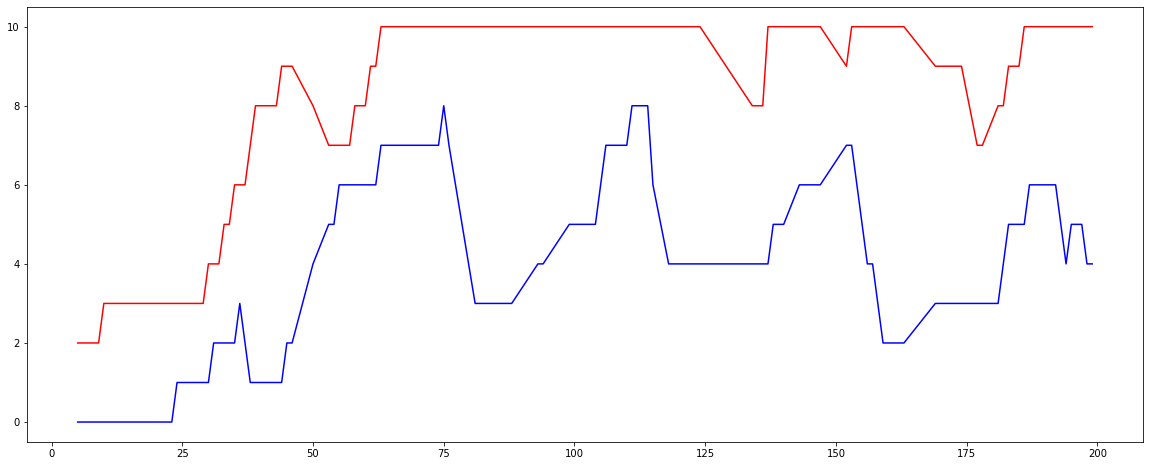

In [7]:
X = list(df_input.index)
plt.figure(figsize=(20,8))
plt.plot (X,list(df_input.num_veh_tot), "r");
#plt.plot (X,list(df_input.num_veh_moving), "g")
plt.plot (X,list(df_input.num_veh_still), "b")

In [8]:
# in how many rows all the vehicles are moving? 
sum(df_input.all_veh_moving)/len(df_input)

0.1056338028169014

In [9]:
# on the totality of input rows, how many contain vehicles that are moving ?
sum(df_input.num_veh_moving) /sum(df_input.num_veh_tot)

0.5124677558039553


20210710-20h38m27s_timesteps14930_ec3500_em7000


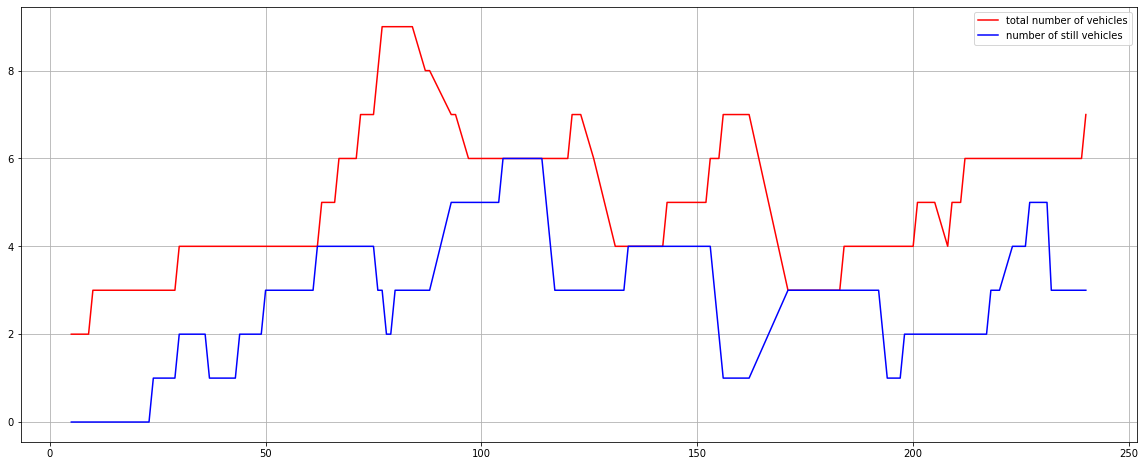

in how many rows all the vehicles are moving?
0.07301317467063323
on the totality of input rows, how many contain vehicles that are moving ?
0.4433098348192688

20210711-17h59m44s_timesteps30000_ec3500_em7000


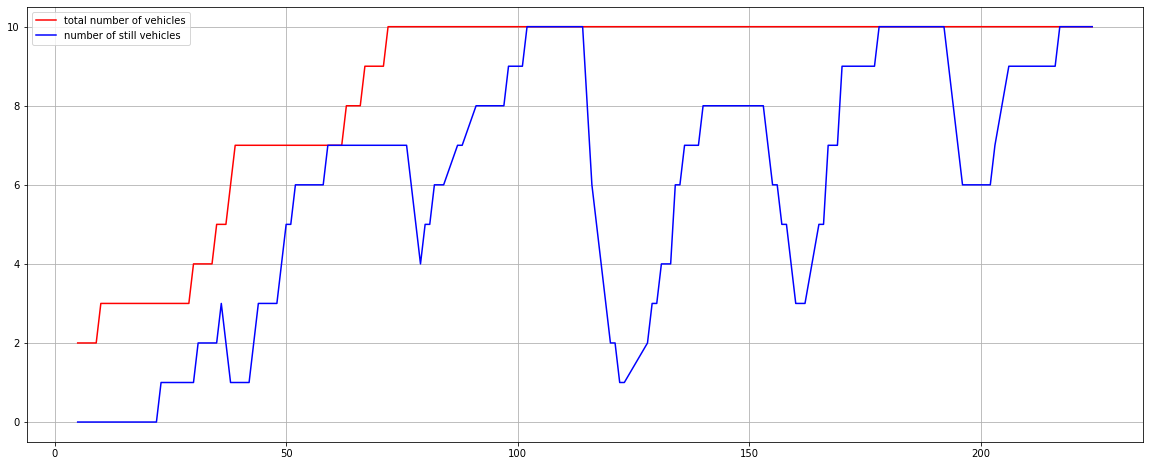

in how many rows all the vehicles are moving?
0.026305253042921205
on the totality of input rows, how many contain vehicles that are moving ?
0.2929934263267597

20210710-11h46m35s_timesteps200_ec3500_em7000


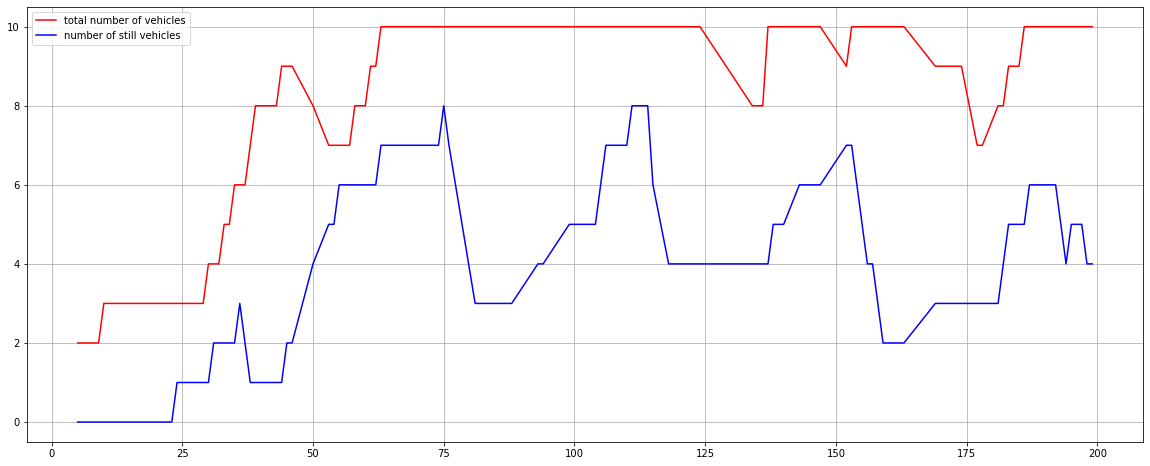

in how many rows all the vehicles are moving?
0.1056338028169014
on the totality of input rows, how many contain vehicles that are moving ?
0.5124677558039553

20210724-19h49m31s_timesteps150000_ec3500_em7000


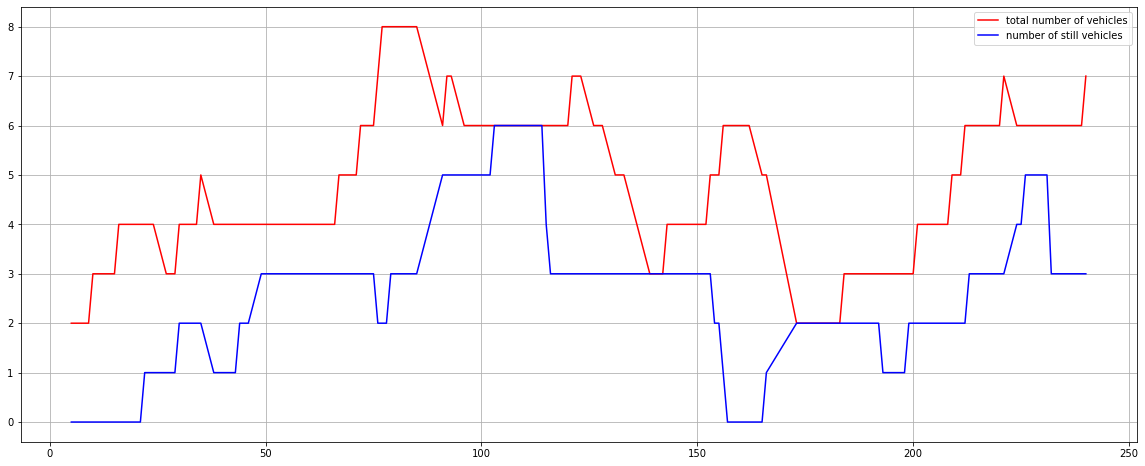

in how many rows all the vehicles are moving?
0.07315891472868218
on the totality of input rows, how many contain vehicles that are moving ?
0.452928781430368

20210725-16h24m21s_timesteps200_ec3500_em7000


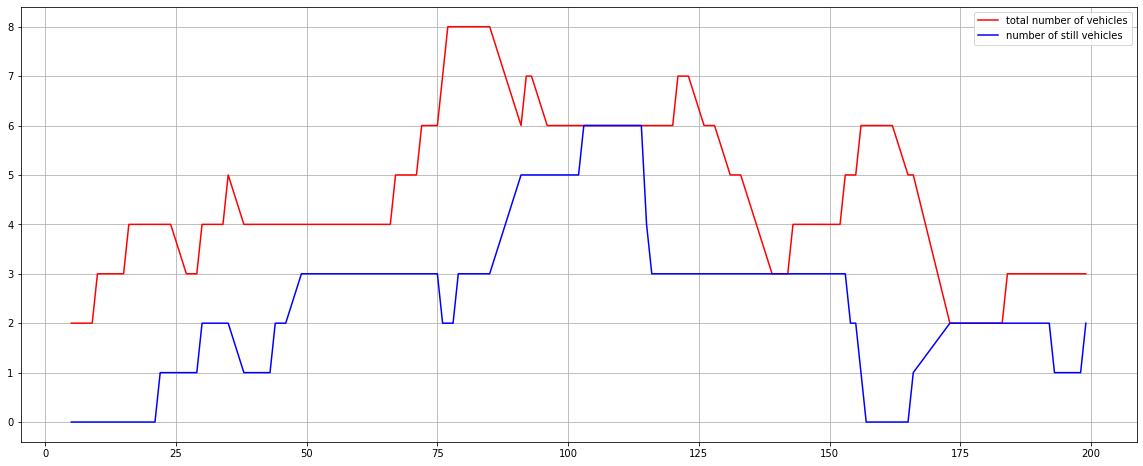

in how many rows all the vehicles are moving?
0.13496932515337423
on the totality of input rows, how many contain vehicles that are moving ?
0.4528301886792453


In [10]:
### old inputs with intention right, left, u turn
inputs = ["20210710-20h38m27s_timesteps14930_ec3500_em7000",
          "20210711-17h59m44s_timesteps30000_ec3500_em7000",
          "20210710-11h46m35s_timesteps200_ec3500_em7000",
          "20210724-19h49m31s_timesteps150000_ec3500_em7000",
          "20210725-16h24m21s_timesteps200_ec3500_em7000"
         ]

START = 0
END = 200

listdf_inputs = []
for input_file_name in inputs:
    print ()
    print (input_file_name)
    df_all,df_selected = select_rows_from_data(input_file_name,drop_col = True)
    df_input = adjust_columns(df_selected)
    df_input["num_veh_tot"] = df_input.apply (lambda row: count_num_veh(row), axis=1)
    df_input["num_veh_moving"] = df_input.apply (lambda row: count_num_veh_moving(row), axis=1)
    df_input["num_veh_still"] = df_input.apply (lambda row: count_num_veh_still(row), axis=1)

    #print (df_input[["data_pos_zc","data_y_zc",
                     #"data_y_delta","Still_vehicle",
                     #"num_veh_tot","num_veh_moving",
                     #"num_veh_still","all_veh_moving"]])

    X = list(df_input[START:END].index)

    ## INITIALIZE FIGURE
    fig, ax = plt.subplots(figsize= (20,8))
    
    ax.plot (X,list(df_input.num_veh_tot)[START:END], "r",label= "total number of vehicles")
    #plt.plot (X,list(df_input.num_veh_moving)[START:END], "g")
    ax.plot (X,list(df_input.num_veh_still)[START:END], "b",label= "number of still vehicles")
    ax.legend()
    ax.grid()
    plt.show()
    
    listdf_inputs.append(df_input)
    print ("in how many rows all the vehicles are moving?")
    print (sum(df_input.all_veh_moving)/len(df_input))

    print ("on the totality of input rows, how many contain vehicles that are moving ?")
    print (sum(df_input.num_veh_moving) /sum(df_input.num_veh_tot))

In [11]:
big_fat_df = pd.concat(listdf_inputs)
big_fat_df

,data_x,data_pos,data_edges,data_edges_renamed,data_y,data_edges_attr,training_row,data_pos_zc,Still_vehicle,data_y_zc,data_y_yaw,data_x_rad,data_y_delta,all_veh_moving,num_veh_tot,num_veh_moving,num_veh_still
5,"[[180.0, 6.25, 1.0], [0.0, 0.0, 1.0]]","[[98.4, 183.38], [101.6, 5.1]]","[[0], [1]]","[[0], [1]]","[[98.4, 165.1, 180.0], [101.6, 11.5, 0.0]]",[1.4000000000000001],True,"[[-1.5999999999999943, 83.38], [1.599999999999...","[[False], [False]]","[[-1.5999999999999943, 65.1], [1.5999999999999...","[[3.141592653589793], [0.0]]","[[3.141592653589793, 6.25, 1.0], [0.0, 0.0, 1.0]]","[[0.0, -18.28], [0.0, 6.400000000000006]]",True,2,2,0
6,"[[180.0, 8.46, 1.0], [0.0, 1.96, 1.0]]","[[98.4, 174.92], [101.6, 7.06]]","[[0], [1]]","[[0], [1]]","[[98.4, 152.94, 180.0], [101.6, 17.33, 0.0]]",[1.4000000000000001],True,"[[-1.5999999999999943, 74.91999999999999], [1....","[[False], [False]]","[[-1.5999999999999943, 52.94], [1.599999999999...","[[3.141592653589793], [0.0]]","[[3.141592653589793, 8.46, 1.0], [0.0, 1.96, 1...","[[0.0, -21.97999999999999], [0.0, 10.269999999...",True,2,2,0
7,"[[180.0, 9.82, 1.0], [0.0, 4.44, 1.0]]","[[98.4, 165.1], [101.6, 11.5]]","[[0], [1]]","[[0], [1]]","[[98.4, 139.08, 180.0], [101.6, 25.54, 0.0]]",[1.4000000000000001],True,"[[-1.5999999999999943, 65.1], [1.5999999999999...","[[False], [False]]","[[-1.5999999999999943, 39.08000000000001], [1....","[[3.141592653589793], [0.0]]","[[3.141592653589793, 9.82, 1.0], [0.0, 4.44, 1...","[[0.0, -26.019999999999982], [0.0, 14.03999999...",True,2,2,0
8,"[[180.0, 12.16, 1.0], [0.0, 5.83, 1.0]]","[[98.4, 152.94], [101.6, 17.33]]","[[0], [1]]","[[0], [1]]","[[98.4, 123.22, 180.0], [101.6, 35.19, 0.0]]",[1.6],True,"[[-1.5999999999999943, 52.94], [1.599999999999...","[[False], [False]]","[[-1.5999999999999943, 23.22], [1.599999999999...","[[3.141592653589793], [0.0]]","[[3.141592653589793, 12.16, 1.0], [0.0, 5.83, ...","[[0.0, -29.72], [0.0, 17.86]]",True,2,2,0
9,"[[180.0, 13.86, 1.0], [0.0, 8.21, 1.0]]","[[98.4, 139.08], [101.6, 25.54]]","[[0], [1]]","[[0], [1]]","[[98.4, 105.61, 180.0], [101.6, 46.24, 0.0]]",[1.7000000000000002],True,"[[-1.5999999999999943, 39.08000000000001], [1....","[[False], [False]]","[[-1.5999999999999943, 5.609999999999999], [1....","[[3.141592653589793], [0.0]]","[[3.141592653589793, 13.86, 1.0], [0.0, 8.21, ...","[[0.0, -33.47000000000001], [0.0, 20.700000000...",True,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"[[90.0, 1.72, 4.0], [180.0, 0.0, 4.0], [270.0,...","[[93.51, 98.4], [98.4, 108.2], [108.78, 101.6]]","[[16, 16, 17], [17, 18, 18]]","[[0, 0, 1], [1, 2, 2]]","[[101.79, 98.4, 90.0], [98.4, 108.2, 180.0], [...","[16.6, 14.399999999999999, 15.299999999999999]",True,"[[-6.489999999999995, -1.5999999999999943], [-...","[[False], [True], [False]]","[[1.7900000000000063, -1.5999999999999943], [-...","[[1.5707963267948966], [3.141592653589793], [4...","[[1.5707963267948966, 1.72, 4.0], [3.141592653...","[[8.280000000000001, 0.0], [0.0, 0.0], [-0.530...",False,3,2,1
196,"[[90.0, 3.12, 4.0], [180.0, 0.0, 4.0], [270.0,...","[[96.63, 98.4], [98.4, 108.2], [108.45, 101.6]]","[[16, 16, 17], [17, 18, 18]]","[[0, 0, 1], [1, 2, 2]]","[[108.59, 98.4, 90.0], [98.4, 108.2, 180.0], [...","[17.0, 15.7, 15.8]",True,"[[-3.3700000000000045, -1.5999999999999943], [...","[[False], [True], [False]]","[[8.590000000000003, -1.5999999999999943], [-1...","[[1.5707963267948966], [3.141592653589793], [4...","[[1.5707963267948966, 3.12, 4.0], [3.141592653...","[[11.960000000000008, 0.0], [0.0, 0.0], [-0.23...",False,3,2,1
197,"[[90.0, 5.16, 4.0], [180.0, 0.0, 4.0], [270.0,...","[[101.79, 98.4], [98.4, 108.2], [108.25, 101.6]]","[[16, 16, 17], [17, 18, 18]]","[[0, 0, 1], [1, 2, 2]]","[[117.09, 98.4, 90.0], [98.4, 108.2, 180.0], [...","[16.8, 18.8, 16.1]",True,"[[1.7900000000000063, -1.5999999999999943], [-...","[[False], [True], [False]]","[[17.090000000000003, -1.5999999999999943], [-...","[[1.5707963267948966], [3.141592653589793]

In [12]:
mask = big_fat_df.all_veh_moving == True
df_only_moving = big_fat_df[mask]

In [13]:
mask = big_fat_df.all_veh_moving == False
df_others = big_fat_df[mask]

In [16]:
df_others_sampled = df_others.sample(n = len(df_only_moving))

In [14]:
df_only_moving

,data_x,data_pos,data_edges,data_edges_renamed,data_y,data_edges_attr,training_row,data_pos_zc,Still_vehicle,data_y_zc,data_y_yaw,data_x_rad,data_y_delta,all_veh_moving,num_veh_tot,num_veh_moving,num_veh_still
5,"[[180.0, 6.25, 1.0], [0.0, 0.0, 1.0]]","[[98.4, 183.38], [101.6, 5.1]]","[[0], [1]]","[[0], [1]]","[[98.4, 165.1, 180.0], [101.6, 11.5, 0.0]]",[1.4000000000000001],True,"[[-1.5999999999999943, 83.38], [1.599999999999...","[[False], [False]]","[[-1.5999999999999943, 65.1], [1.5999999999999...","[[3.141592653589793], [0.0]]","[[3.141592653589793, 6.25, 1.0], [0.0, 0.0, 1.0]]","[[0.0, -18.28], [0.0, 6.400000000000006]]",True,2,2,0
6,"[[180.0, 8.46, 1.0], [0.0, 1.96, 1.0]]","[[98.4, 174.92], [101.6, 7.06]]","[[0], [1]]","[[0], [1]]","[[98.4, 152.94, 180.0], [101.6, 17.33, 0.0]]",[1.4000000000000001],True,"[[-1.5999999999999943, 74.91999999999999], [1....","[[False], [False]]","[[-1.5999999999999943, 52.94], [1.599999999999...","[[3.141592653589793], [0.0]]","[[3.141592653589793, 8.46, 1.0], [0.0, 1.96, 1...","[[0.0, -21.97999999999999], [0.0, 10.269999999...",True,2,2,0
7,"[[180.0, 9.82, 1.0], [0.0, 4.44, 1.0]]","[[98.4, 165.1], [101.6, 11.5]]","[[0], [1]]","[[0], [1]]","[[98.4, 139.08, 180.0], [101.6, 25.54, 0.0]]",[1.4000000000000001],True,"[[-1.5999999999999943, 65.1], [1.5999999999999...","[[False], [False]]","[[-1.5999999999999943, 39.08000000000001], [1....","[[3.141592653589793], [0.0]]","[[3.141592653589793, 9.82, 1.0], [0.0, 4.44, 1...","[[0.0, -26.019999999999982], [0.0, 14.03999999...",True,2,2,0
8,"[[180.0, 12.16, 1.0], [0.0, 5.83, 1.0]]","[[98.4, 152.94], [101.6, 17.33]]","[[0], [1]]","[[0], [1]]","[[98.4, 123.22, 180.0], [101.6, 35.19, 0.0]]",[1.6],True,"[[-1.5999999999999943, 52.94], [1.599999999999...","[[False], [False]]","[[-1.5999999999999943, 23.22], [1.599999999999...","[[3.141592653589793], [0.0]]","[[3.141592653589793, 12.16, 1.0], [0.0, 5.83, ...","[[0.0, -29.72], [0.0, 17.86]]",True,2,2,0
9,"[[180.0, 13.86, 1.0], [0.0, 8.21, 1.0]]","[[98.4, 139.08], [101.6, 25.54]]","[[0], [1]]","[[0], [1]]","[[98.4, 105.61, 180.0], [101.6, 46.24, 0.0]]",[1.7000000000000002],True,"[[-1.5999999999999943, 39.08000000000001], [1....","[[False], [False]]","[[-1.5999999999999943, 5.609999999999999], [1....","[[3.141592653589793], [0.0]]","[[3.141592653589793, 13.86, 1.0], [0.0, 8.21, ...","[[0.0, -33.47000000000001], [0.0, 20.700000000...",True,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,"[[0.0, 8.35, 0.0], [273.43, 5.73, 0.0], [270.0...","[[101.6, 118.12], [105.11, 101.9], [118.78, 10...","[[12, 12, 12, 12, 12, 13, 13, 13, 13, 15, 15, ...","[[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5]...","[[101.6, 141.5, 0.0], [101.6, 110.7, 357.56], ...","[9.0, 5.4, 2.9, 1.7999999999999998, 8.5, 8.0, ...",True,"[[1.5999999999999943, 18.120000000000005], [5....","[[False], [False], [False], [False], [False], ...","[[1.5999999999999943, 41.5], [1.59999999999999...","[[0.0], [6.240599273430925], [4.71238898038469...","[[0.0, 8.35, 0.0], [4.772253773728095, 5.73, 0...","[[0.0, 23.379999999999995], [-3.51000000000000...",True,6,6,0
160,"[[0.0, 10.66, 0.0], [325.01, 5.68, 0.0], [270....","[[101.6, 128.78], [101.78, 105.97], [113.98, 1...","[[12, 12, 12, 12, 12, 13, 13, 13, 13, 15, 15, ...","[[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5]...","[[101.6, 155.53, 0.0], [101.6, 117.14, 0.0], [...","[11.0, 5.7, 4.3, 2.0999999999999996, 5.7, 7.5,...",True,"[[1.5999999999999943, 28.78], [1.7800000000000...","[[False], [False], [False], [False], [False], ...","[[1.5999999999999943, 55.53], [1.5999999999999...","[[0.0], [0.0], [4.97715542791223], [4.71238898...","[[0.0, 10.66, 0.0], [5.67249460190677, 5.68, 0...","[[0.0, 26.75], [-0.18000000000000682, 11.17000...",True,6,6,0
161,"[[0.0, 12.72, 0.0], [357.56, 4.74, 0.0], [270....","[[101.6, 141.5], [101.6, 110.7], [108.31, 101....","[[12, 12, 12, 12, 12, 13, 13, 13, 13, 15, 15, ...","[[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5]...","[[101.6, 172.08, 0.0], [10

In [ ]:
#df_only_moving = df_only_moving.reset_index()
#file_to_write = f"../004_data/GCN_input/df_only_moving_vehicles.pkl"
#df_only_moving.to_pickle(file_to_write)

In [17]:
df_others_sampled

,data_x,data_pos,data_edges,data_edges_renamed,data_y,data_edges_attr,training_row,data_pos_zc,Still_vehicle,data_y_zc,data_y_yaw,data_x_rad,data_y_delta,all_veh_moving,num_veh_tot,num_veh_moving,num_veh_still
147,"[[270.0, 0.0, 0.0], [270.0, 0.0, 0.0], [270.0,...","[[108.2, 101.6], [115.7, 101.6], [123.2, 101.6...","[[12, 12, 12, 13, 13, 15], [13, 15, 8, 15, 8, 8]]","[[1, 1, 1, 2, 2, 3], [2, 3, 0, 3, 0, 0]]","[[108.2, 101.6, 270.0], [115.7, 101.6, 270.0],...","[11.0, 2.1, 13.0, 2.2, 7.6, 2.0]",True,"[[8.200000000000003, 1.5999999999999943], [15....","[[True], [True], [True], [False]]","[[8.200000000000003, 1.5999999999999943], [15....","[[4.71238898038469], [4.71238898038469], [4.71...","[[4.71238898038469, 0.0, 0.0], [4.712388980384...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [-21.1500...",False,4,1,3
7470,"[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [90.0, 0.0,...","[[101.6, 91.8], [101.6, 84.3], [91.8, 98.4], [...","[[739, 742, 736, 745, 742, 739, 742, 740, 736,...","[[1, 4, 0, 7, 4, 1, 4, 2, 0, 0, 3, 5, 5, 2, 0,...","[[101.6, 91.8, 0.0], [101.6, 84.3, 0.0], [91.8...","[8.5, 6.1, 7.6, 6.2, 6.1, 4.5, 5.9, 5.2, 5.5, ...",True,"[[1.5999999999999943, -8.200000000000003], [1....","[[True], [True], [True], [True], [True], [True...","[[1.5999999999999943, -8.200000000000003], [1....","[[0.0], [0.0], [1.5707963267948966], [4.712388...","[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.57079632...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",False,10,2,8
37052,"[[25.25, 6.07, 0.0], [180.0, 0.0, 2.0], [0.0, ...","[[101.27, 104.88], [98.4, 108.2], [101.6, 91.8...","[[3603, 3603, 3603, 3603, 3603, 3603, 3604, 36...","[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2,...","[[101.6, 121.2, 0.0], [98.4, 108.2, 180.0], [1...","[23.4, 15.8, 10.8, 7.0, 8.6, 2.7, 15.0, 13.0, ...",True,"[[1.269999999999996, 4.8799999999999955], [-1....","[[False], [True], [True], [True], [True], [Fal...","[[1.5999999999999943, 21.200000000000003], [-1...","[[0.0], [3.141592653589793], [0.0], [3.1415926...","[[0.4406956361285682, 6.07, 0.0], [3.141592653...","[[0.3299999999999983, 16.320000000000007], [0....",False,7,3,4
6168,"[[90.0, 13.11, 1.0], [270.0, 6.06, 0.0], [180....","[[143.79, 98.4], [84.85, 101.6], [98.4, 108.2]...","[[625, 628, 625, 628, 629, 625], [630, 629, 62...","[[0, 1, 0, 1, 2, 0], [3, 2, 1, 3, 3, 2]]","[[176.06, 98.4, 90.0], [66.09, 101.6, 270.0], ...","[3.5, 9.899999999999999, 3.0999999999999996, 9...",True,"[[43.78999999999999, -1.5999999999999943], [-1...","[[False], [False], [True], [True]]","[[76.06, -1.5999999999999943], [-33.91, 1.5999...","[[1.5707963267948966], [4.71238898038469], [3....","[[1.5707963267948966, 13.11, 1.0], [4.71238898...","[[32.27000000000001, 0.0], [-18.75999999999999...",False,4,2,2
3233,"[[90.0, 0.0, 1.0], [90.0, 0.0, 0.0], [90.0, 0....","[[91.8, 98.4], [84.3, 98.4], [76.8, 98.4], [69...","[[337, 335, 334, 332, 334, 334, 336, 335, 334,...","[[4, 2, 1, 0, 1, 1, 3, 2, 1, 2, 5, 0, 0, 1, 0,...","[[91.8, 98.4, 90.0], [84.3, 98.4, 90.0], [76.8...","[3.9000000000000004, 10.0, 8.5, 4.3, 9.2, 11.0...",True,"[[-8.200000000000003, -1.5999999999999943], [-...","[[True], [True], [True], [True], [True], [True...","[[-8.200000000000003, -1.5999999999999943], [-...","[[1.5707963267948966], [1.5707963267948966], [...","[[1.5707963267948966, 0.0, 1.0], [1.5707963267...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",False,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114742,"[[180.0, 0.0, 1.0], [180.0, 0.0, 2.0]]","[[98.4, 108.2], [98.4, 115.7]]","[[11229], [11231]]","[[0], [1]]","[[98.4, 108.2, 180.0], [98.4, 115.7, 180.0]]",[13.0],True,"[[-1.5999999999999943, 8.200000000000003], [-1...","[[True], [True]]","[[-1.5999999999999943, 8.200000000000003], [-1...","[[3.141592653589793], [3.141592653589793]]","[[3.141592653589793, 0.0, 1.0], [3.14159265358...","[[0.0, 0.0], [0.0, 0.0]]",False,2,0,2
103245,"[[0.0, 14.47, 0.0], [180.0, 13.26, 2.0], [90.0...","[[101.6, 161.5], [98.4, 66.33], [91.8, 98.4], ...","[[10118,

In [18]:
df_balanced = pd.concat([df_others_sampled, df_only_moving], sort=True)
df_balanced

,Still_vehicle,all_veh_moving,data_edges,data_edges_attr,data_edges_renamed,data_pos,data_pos_zc,data_x,data_x_rad,data_y,data_y_delta,data_y_yaw,data_y_zc,num_veh_moving,num_veh_still,num_veh_tot,training_row
147,"[[True], [True], [True], [False]]",False,"[[12, 12, 12, 13, 13, 15], [13, 15, 8, 15, 8, 8]]","[11.0, 2.1, 13.0, 2.2, 7.6, 2.0]","[[1, 1, 1, 2, 2, 3], [2, 3, 0, 3, 0, 0]]","[[108.2, 101.6], [115.7, 101.6], [123.2, 101.6...","[[8.200000000000003, 1.5999999999999943], [15....","[[270.0, 0.0, 0.0], [270.0, 0.0, 0.0], [270.0,...","[[4.71238898038469, 0.0, 0.0], [4.712388980384...","[[108.2, 101.6, 270.0], [115.7, 101.6, 270.0],...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [-21.1500...","[[4.71238898038469], [4.71238898038469], [4.71...","[[8.200000000000003, 1.5999999999999943], [15....",1,3,4,True
7470,"[[True], [True], [True], [True], [True], [True...",False,"[[739, 742, 736, 745, 742, 739, 742, 740, 736,...","[8.5, 6.1, 7.6, 6.2, 6.1, 4.5, 5.9, 5.2, 5.5, ...","[[1, 4, 0, 7, 4, 1, 4, 2, 0, 0, 3, 5, 5, 2, 0,...","[[101.6, 91.8], [101.6, 84.3], [91.8, 98.4], [...","[[1.5999999999999943, -8.200000000000003], [1....","[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [90.0, 0.0,...","[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.57079632...","[[101.6, 91.8, 0.0], [101.6, 84.3, 0.0], [91.8...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[[0.0], [0.0], [1.5707963267948966], [4.712388...","[[1.5999999999999943, -8.200000000000003], [1....",2,8,10,True
37052,"[[False], [True], [True], [True], [True], [Fal...",False,"[[3603, 3603, 3603, 3603, 3603, 3603, 3604, 36...","[23.4, 15.8, 10.8, 7.0, 8.6, 2.7, 15.0, 13.0, ...","[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2,...","[[101.27, 104.88], [98.4, 108.2], [101.6, 91.8...","[[1.269999999999996, 4.8799999999999955], [-1....","[[25.25, 6.07, 0.0], [180.0, 0.0, 2.0], [0.0, ...","[[0.4406956361285682, 6.07, 0.0], [3.141592653...","[[101.6, 121.2, 0.0], [98.4, 108.2, 180.0], [1...","[[0.3299999999999983, 16.320000000000007], [0....","[[0.0], [3.141592653589793], [0.0], [3.1415926...","[[1.5999999999999943, 21.200000000000003], [-1...",3,4,7,True
6168,"[[False], [False], [True], [True]]",False,"[[625, 628, 625, 628, 629, 625], [630, 629, 62...","[3.5, 9.899999999999999, 3.0999999999999996, 9...","[[0, 1, 0, 1, 2, 0], [3, 2, 1, 3, 3, 2]]","[[143.79, 98.4], [84.85, 101.6], [98.4, 108.2]...","[[43.78999999999999, -1.5999999999999943], [-1...","[[90.0, 13.11, 1.0], [270.0, 6.06, 0.0], [180....","[[1.5707963267948966, 13.11, 1.0], [4.71238898...","[[176.06, 98.4, 90.0], [66.09, 101.6, 270.0], ...","[[32.27000000000001, 0.0], [-18.75999999999999...","[[1.5707963267948966], [4.71238898038469], [3....","[[76.06, -1.5999999999999943], [-33.91, 1.5999...",2,2,4,True
3233,"[[True], [True], [True], [True], [True], [True...",False,"[[337, 335, 334, 332, 334, 334, 336, 335, 334,...","[3.9000000000000004, 10.0, 8.5, 4.3, 9.2, 11.0...","[[4, 2, 1, 0, 1, 1, 3, 2, 1, 2, 5, 0, 0, 1, 0,...","[[91.8, 98.4], [84.3, 98.4], [76.8, 98.4], [69...","[[-8.200000000000003, -1.5999999999999943], [-...","[[90.0, 0.0, 1.0], [90.0, 0.0, 0.0], [90.0, 0....","[[1.5707963267948966, 0.0, 1.0], [1.5707963267...","[[91.8, 98.4, 90.0], [84.3, 98.4, 90.0], [76.8...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[[1.5707963267948966], [1.5707963267948966], [...","[[-8.200000000000003, -1.5999999999999943], [-...",0,7,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,"[[False], [False], [False], [False], [False], ...",True,"[[12, 12, 12, 12, 12, 13, 13, 13, 13, 15, 15, ...","[9.0, 5.4, 2.9, 1.7999999999999998, 8.5, 8.0, ...","[[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5]...","[[101.6, 118.12], [105.11, 101.9], [118.78, 10...","[[1.5999999999999943, 18.120000000000005], [5....","[[0.0, 8.35, 0.0], [273.43, 5.73, 0.0], [270.0...","[[0.0, 8.35, 0.0], [4.772253773728095, 5.73, 0...","[[101.6, 141.5, 0.0], [101.6, 110.7, 357.56], ...","[[0.0, 23.379999999999995], [-3.51000000000000...","[[0.0], [6.240599273430

In [19]:
file_to_write = f"../004_data/GCN_input/df_balanced_{len(df_balanced)}.pkl"
df_balanced.to_pickle(file_to_write)

In [19]:
abs(-2+1)

1